<a href="https://colab.research.google.com/github/Capstone-Project-July/Interim/blob/master/Project_Capstone_Model_Building_Final2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from IPython.display import clear_output
from keras.models import Model 
from keras.layers import Embedding, Activation, SpatialDropout1D, Flatten, Dense, Input, LSTM, Bidirectional, Dropout, Conv1D, MaxPool1D, CuDNNLSTM, GlobalMaxPool1D
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
#For stopwords and tokenisation
import string
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing #Changing categorical data to one hot encoding
from nltk.tokenize import RegexpTokenizer
from sklearn.cluster import KMeans
from nltk.stem import PorterStemmer
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation #Using this to best summarize the data
from matplotlib import pyplot 

#Models

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, Activation, SpatialDropout1D, Flatten, Dense, Input, LSTM, Bidirectional, Dropout, Conv1D, MaxPool1D, CuDNNLSTM, GlobalMaxPool1D, MaxPooling1D, GRU


# Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


In [2]:
from google.colab import drive

drive.mount('/content/drive')
#Loading the datafile
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Preprocessed_input_data_114.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data.head(100)

,Unnamed: 0,Short description,Description,Assignment group,Assignment group Encoded,Tokens,Tweet Tokens,Cluster,features,Cluster TFIDFV
0,0,login issue,-verified user details.(employee# & manager na...,0,0,"['caller', 'employe', 'check', 'ad', 'manag', ...","['caller', 'employe', 'check', 'ad', 'manag', ...",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
1,1,outlook,"\r\n\r\nreceived from: \r\n\r\nhello team,\r\n...",0,0,"['team', 'calendar', 'meet', 'outlook', 'corre...","['team', 'calendar', 'meet', 'outlook', 'corre...",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
2,2,cant log in to vpn,\r\n\r\nreceived from: \r\n\r\nhi\r\n\r\ni can...,0,0,"['log', 'cant', 'vpn']","['log', 'cant', 'vpn', 'cannot']",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
3,3,unable to access hr_tool page,unable to access hr_tool page,0,0,"['hr', 'page', 'tool', 'access']","['hr', 'page', 'tool', 'access']",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
4,4,skype error,skype error,0,0,"['skype', 'error']","['skype', 'error']",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
...,...,...,...,...,...,...,...,...,...,...
95,99,password expiry tomorrow,\n\nreceived from: \n\nmy system says my passw...,0,0,"['server', 'tomorrow', 'expiri', 'chang', 'pas...","['server', 'check', 'tomorrow', 'expiri', 'cha...",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",0
96,100,re: ess portal access issue,"\n\nreceived from: \n\nhello,\n\nhe is an kios...",0,0,"['employe', 'revert', 'kiosk', 'compani', 'aki...","['employe', 'revert', 'kiosk', 'compani', 'aki...",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
97,101,ess portal access issue,"\n\nreceived from: \n\nhi,\n\nbelow mentioned ...",0,0,"['portal', 'employe', 'revert', 'content', 'sl...","['portal', 'employe', 'revert', 'content', 'sl...",2,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",2
98,102,job Job_1390 failed in job_scheduler at: 10/29...,received from: \r\n\r\njob Job_1390 failed in ...,13,73,"['job', 'schedul']","['job', 'schedul']",0,"(0, 788)\t0.22105651897018327\n (0, 547)\t0...",1


# **Model to predict the ticket into any of the 3 clusters¶**

In [4]:
X = data['Description'] 
Y = data['Cluster TFIDFV']   
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [5]:
sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='log', penalty='elasticnet',alpha=1e-5, random_state=42, max_iter=35, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

0.9850674373795761


In [6]:
x=sgd.predict(['unable to view payslips from hr_tool e time'])
if x==2:
  print('Predicted Successfully')
else:
  print('Wrong prediction')

Predicted Successfully


#### **The SGD Classifier is able to predict a Description into a Sub Cluster with 99.3% Accuracy**

In [7]:
def lstmm():
    model = Sequential()
    
    model.add(Embedding(input_dim=max_features, output_dim=embed_dim, input_length=maxlen))
    
    model.add(Bidirectional(LSTM(16, return_sequences=True, recurrent_dropout=0.2, dropout=0.2)))
    
    model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1, dropout=0.4)))

    model.add(Dense(350, activation='softmax'))
        
    # Compile the model
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['acc'])
    
    return model


In [8]:


#1D CNN

def conv1d():
    
    model = Sequential()
    
    model.add(Embedding(input_dim=max_features,output_dim=embed_dim, input_length=maxlen))
    
    model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
    
    model.add(MaxPool1D(pool_size=8))
    
    model.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
    
    model.add(Dropout(0.4))
    
    model.add(GlobalMaxPool1D())
    
    model.add(Dense(350, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics= ['acc'])
    
    return model




# Models for individual clusters

We are using a multiple model approach where the below steps are followed when we get a new Ticket
> The description is analyzed
> It is converted into a TFIDF Vector using TFIDF Vectorizer
> An SGD Classifier is used to predict the subgroup of the ticket
> Once the Sub Group is predicted, the corresponding assignment Groups are predicted using individual models for each sub groups

**Applying different models on CLuster 0**

#### **Chi Square Analysis on Logistic Regression**

In [9]:
X = data['Description'][data['Cluster TFIDFV']==0]
Y = data['Assignment group'][data['Cluster TFIDFV']==0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [10]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [11]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 96.29629629629629
Accuracy Score Train: 97.14285714285714


#### **Creating the TFIDF Vectors for further processing**

In [12]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [13]:
nb = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X,Y)

#Test Set
Y_pred = nb.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nb.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :96.29629629629629


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       260
           6       0.00      0.00      0.00        10

    accuracy                           0.96       270
   macro avg       0.48      0.50      0.49       270
weighted avg       0.93      0.96      0.94       270



Accuracy Score Train :97.14285714285714


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       612
           2       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        15

    accuracy                           0.97       630
   macro avg       0.32      0.33      0.33       630
weighted avg       0.94      0.97      0.96       630



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [14]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVM.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVM.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVM.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)




Accuracy Score Test:  96.29629629629629
Accuracy Score Train :  98.09523809523809


#### **Decision tree**


In [15]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTree.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTree.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTree.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTree.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTree.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  95.55555555555556
Accuracy Score Train :  98.57142857142858


#### **Bagging Classifier**

In [16]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(train_vectors_0, Y_train)

y_predict = bgcl.predict(test_vectors_0)

print('Accuracy Score Test : ',bgcl.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgcl.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgcl.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  95.55555555555556
Accuracy Score Train :  98.4126984126984


#### **Adaboost Classifier**

In [17]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(train_vectors_0, Y_train)

y_predict = abcl.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abcl.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abcl.score(test_vectors_0, Y_test)*100)


y_predict = abcl.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  94.81481481481482
Accuracy Score Train :  96.03174603174604


#### **Gradient Boost Classifier**



In [18]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(train_vectors_0, Y_train)

y_predict = gbcl.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbcl.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbcl.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  94.44444444444444
Accuracy Score Train :  99.84126984126985


#### **Out of all the models Decision Tree has the highest accuracy to predict the final class of cluster 0 and the lowest overfitting**

#### **Randomized Search CV to enhance Decision tree**



In [19]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTree, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=34, criterion=gini ....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... max_depth=4, criterion=gini, total=   0.0s
[CV] max_depth=4, criterion=gini .....................................
[CV] ...................... max_depth=4, criterion=gini, total=   0.0s
[CV] max_depth=29, criterion=gini ....................................
[CV] ..................... max_depth=29, criterion=gini, total=   0.0s
[CV] max_depth=29, criterion=gini ....................................
[CV] ..................... max_depth=29, criterion=gini, total=   0.0s
[CV] max_depth=29, criterion=gini ....................................
[CV] ..................... max_depth=29, criterion=gini, total=   0.0s
[CV] max_depth=68, criterion=entropy .................................
[CV] .................. max_depth=68, criterion=entropy, total=   0.0s
[CV] max_depth=68, criterion=entropy .................................
[CV] .................. max_depth=68, criterion=entropy, total=   0.0s
[CV] max_depth=68, criterion=entropy .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [20]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 58}

In [21]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=2,random_state=1)
dTree.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTree.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTree.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTree.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTree.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  95.92592592592592
Accuracy Score Train :  97.93650793650794


#### With the randomized search, it seems that we have a lower accuracy

In [22]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVM, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=1, C=2.6999999999999997 ........
[CV]  kernel=poly, gamma=scale, degree=1, C=2.6999999999999997, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=1, C=2.6999999999999997 ........
[CV]  kernel=poly, gamma=scale, degree=1, C=2.6999999999999997, total=   0.0s
[CV] kernel=poly, gamma=sca

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [23]:
random_searchSVM.best_params_



{'C': 2.6999999999999997, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [24]:
SVM = svm.SVC(C=0.7, kernel='rbf', degree=4, gamma='auto')
SVM.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVM.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVM.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  96.29629629629629
Accuracy Score Train :  97.14285714285714


#### **Sequential Model**

In [25]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

In [26]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'][data['Cluster TFIDFV']==0])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'][data['Cluster TFIDFV']==0])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(630, 350) (630,)
(270, 350) (270,)


In [27]:
models = Sequential()
models.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
models.add(SpatialDropout1D(0.4))
models.add(MaxPooling1D(pool_size=4))
models.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
models.add(Dense(350,activation='softmax'))
models.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(models.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_1 (Dense)              (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
models.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=40, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = models.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = models.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 630 samples, validate on 270 samples
Epoch 1/40
 - 4s - loss: 3.7482 - accuracy: 0.9111 - val_loss: 0.8395 - val_accuracy: 0.9741
Epoch 2/40
 - 4s - loss: 0.3555 - accuracy: 0.9667 - val_loss: 0.1725 - val_accuracy: 0.9741
Epoch 3/40
 - 4s - loss: 0.1939 - accuracy: 0.9667 - val_loss: 0.1459 - val_accuracy: 0.9741
Epoch 4/40
 - 4s - loss: 0.1701 - accuracy: 0.9667 - val_loss: 0.1446 - val_accuracy: 0.9741
Epoch 5/40
 - 4s - loss: 0.1659 - accuracy: 0.9667 - val_loss: 0.1408 - val_accuracy: 0.9741
Epoch 6/40
 - 4s - loss: 0.1640 - accuracy: 0.9667 - val_loss: 0.1378 - val_accuracy: 0.9741
Epoch 7/40
 - 4s - loss: 0.1626 - accuracy: 0.9667 - val_loss: 0.1367 - val_accuracy: 0.9741
Epoch 8/40
 - 4s - loss: 0.1618 - accuracy: 0.9667 - val_loss: 0.1374 - val_accuracy: 0.9741
Epoch 9/40
 - 4s - loss: 0.1606 - accuracy: 0.9667 - val_loss: 0.1350 - val_accuracy: 0.9741
Epoch 10/40
 - 4s - loss: 0.1604 - accuracy: 0.9667 - val_loss: 0.1354 - val_accuracy: 0.9741
Epoch 11/40
 - 4s - los

#### **Bidirectional LSTM**

In [29]:
lsmod1 = lstmm()

lshist = lsmod1.fit(X_train,Y_train,
         epochs = 30,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 630 samples, validate on 270 samples
Epoch 1/30
630/630 [==============================] - 11s 17ms/step - loss: 5.8168 - acc: 0.4206 - val_loss: 5.7325 - val_acc: 0.9741
Epoch 2/30
630/630 [==============================] - 8s 12ms/step - loss: 5.6389 - acc: 0.9603 - val_loss: 5.4236 - val_acc: 0.9741
Epoch 3/30
630/630 [==============================] - 8s 12ms/step - loss: 5.2246 - acc: 0.9667 - val_loss: 4.7489 - val_acc: 0.9741
Epoch 4/30
630/630 [==============================] - 8s 12ms/step - loss: 4.4794 - acc: 0.9667 - val_loss: 3.8367 - val_acc: 0.9741
Epoch 5/30
630/630 [==============================] - 8s 12ms/step - loss: 3.5957 - acc: 0.9667 - val_loss: 2.9411 - val_acc: 0.9741
Epoch 6/30
630/630 [==============================] - 8s 12ms/step - loss: 2.7119 - acc: 0.9667 - val_loss: 2.1373 - val_acc: 0.9741
Epoch 7/30
630/630 [==============================] - 8s 12ms/step - loss: 1.9075 - acc: 0.9667 - val_loss: 1.4044 - val_acc: 0.9741
Epoch 8/30
630/630 [==

In [30]:
model.append('Bidirectional LSTM Model')
scores = lsmod1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmod1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




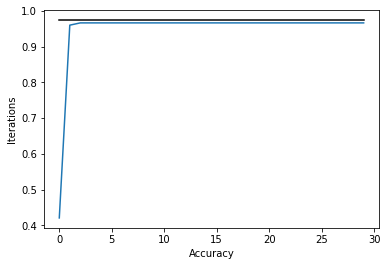

In [31]:
plt.plot(lshist.history['val_acc'],color='black')
plt.plot(lshist.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

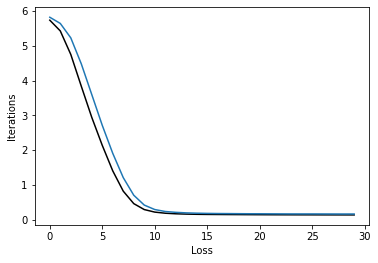

In [32]:
plt.plot(lshist.history['val_loss'],color='black')
plt.plot(lshist.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [33]:

convmod = conv1d()

convhist = convmod.fit(X_train, Y_train,
                      epochs = 30,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 630 samples, validate on 270 samples
Epoch 1/30
630/630 [==============================] - 3s 5ms/step - loss: 5.7570 - acc: 0.0048 - val_loss: 5.6743 - val_acc: 0.0778
Epoch 2/30
630/630 [==============================] - 3s 5ms/step - loss: 5.3761 - acc: 0.4333 - val_loss: 5.3236 - val_acc: 0.9741
Epoch 3/30
630/630 [==============================] - 3s 5ms/step - loss: 4.6276 - acc: 0.9667 - val_loss: 4.6109 - val_acc: 0.9741
Epoch 4/30
630/630 [==============================] - 3s 5ms/step - loss: 3.1651 - acc: 0.9667 - val_loss: 3.2308 - val_acc: 0.9741
Epoch 5/30
630/630 [==============================] - 3s 5ms/step - loss: 1.0566 - acc: 0.9667 - val_loss: 1.1672 - val_acc: 0.9741
Epoch 6/30
630/630 [==============================] - 3s 5ms/step - loss: 0.2468 - acc: 0.9667 - val_loss: 0.2415 - val_acc: 0.9741
Epoch 7/30
630/630 [==============================] - 3s 5ms/step - loss: 0.2628 - acc: 0.9667 - val_loss: 0.1567 - val_acc: 0.9741
Epoch 8/30
630/630 [==========

In [34]:
model.append('1D Convolution Model')
scores = convmod.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmod.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

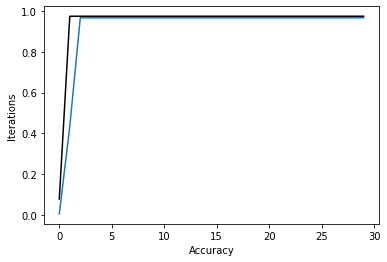

In [35]:
plt.plot(convhist.history['val_acc'],color='black')
plt.plot(convhist.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

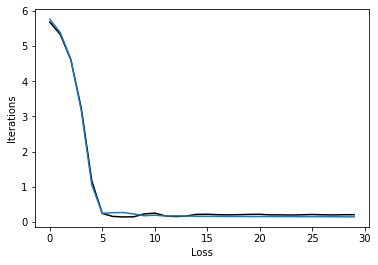

In [36]:
plt.plot(convhist.history['val_loss'],color='black')
plt.plot(convhist.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 1**


In [37]:
cluster0_accuracies=pd.DataFrame()
cluster0_accuracies['Model']=model
cluster0_accuracies['Accuracy(Test)']=accuracytest
cluster0_accuracies['Accuracy(Train)']=accuracytrain
cluster0_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,96.296296,97.142857
1,Multinomial Naive Bayes,96.296296,97.142857
2,Support Vector Machines,96.296296,98.095238
3,Decision Tree,95.555556,98.571429
4,Bagging Classifier,95.555556,98.412698
5,Adaboost Classifier,94.814815,96.031746
6,Gradient Boost Classifier,94.444444,99.841270
7,Decision Tree Hyper Tuned,95.925926,97.936508
8,Support Vector Machines- Hypertuned,96.296296,97.142857
9,Sequential Model,97.777778,98.888886


In [38]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']

<BarContainer object of 12 artists>

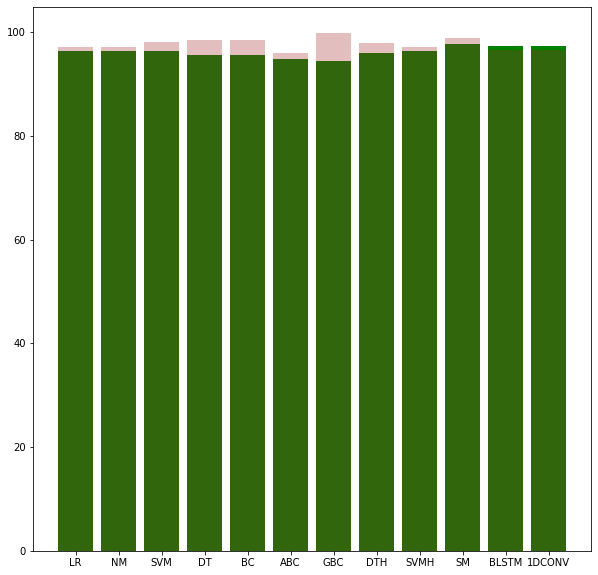

In [39]:
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster0_accuracies['Accuracy(Test)'],color='green')
plt.bar(x_axis,cluster0_accuracies['Accuracy(Train)'],color='brown',alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Decision Tree seems to be the best of all


# **Applying different models on Cluster 1**

#### **Chi Square Analysis on Logistic Regression**

In [40]:
X = data['Description'][data['Cluster TFIDFV']==1]
Y = data['Assignment group'][data['Cluster TFIDFV']==1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [41]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [42]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 41.911764705882355
Accuracy Score Train: 46.68769716088328


#### **Creating the TFIDF Vectors for further processing**

In [43]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [44]:
nbc1 = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nbc1.fit(X,Y)

#Test Set
Y_pred = nbc1.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nbc1.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :53.67647058823529


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
          10       1.00      0.09      0.16        35
          11       1.00      0.02      0.04        45
          12       0.47      1.00      0.64       114
          13       1.00      0.49      0.66        57

    accuracy                           0.54       272
   macro avg       0.50      0.23      0.21       272
weighted avg       0.70      0.54      0.44       272



Accuracy Score Train :56.782334384858046


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
          10       0.83      0.07      0.13   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [45]:
SVMc1 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVMc1.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc1.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc1.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)




Accuracy Score Test:  68.75
Accuracy Score Train :  81.07255520504731


#### **Decision tree**


In [46]:
dTreec1 = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTreec1.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec1.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTreec1.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec1.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec1.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  47.42647058823529
Accuracy Score Train :  53.47003154574133


#### **Bagging Classifier**

In [47]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(train_vectors_0, Y_train)

y_predict = bgcl.predict(test_vectors_0)

print('Accuracy Score Test : ',bgcl.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgcl.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgcl.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  44.85294117647059
Accuracy Score Train :  49.8422712933754


#### **Adaboost Classifier**

In [48]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(train_vectors_0, Y_train)

y_predict = abcl.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abcl.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abcl.score(test_vectors_0, Y_test)*100)


y_predict = abcl.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  44.11764705882353
Accuracy Score Train :  50.315457413249206


#### **Gradient Boost Classifier**



In [49]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(train_vectors_0, Y_train)

y_predict = gbcl.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbcl.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbcl.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  68.38235294117648
Accuracy Score Train :  85.96214511041009


#### **Randomized Search CV to enhance Decision tree**



In [50]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTreec1, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=34, criterion=gini ....................................
[CV] ...........

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=34, criterion=gini, total=   0.0s
[CV] max_depth=2, criterion=entropy ..................................
[CV] ................... max_depth=2, criterion=entropy, total=   0.0s
[CV] max_depth=2, criterion=entropy ..................................
[CV] ................... max_depth=2, criterion=entropy, total=   0.0s
[CV] max_depth=2, criterion=entropy ..................................
[CV] ................... max_depth=2, criterion=entropy, total=   0.0s
[CV] max_depth=84, criterion=entropy .................................
[CV] .................. max_depth=84, criterion=entropy, total=   0.0s
[CV] max_depth=84, criterion=entropy .................................
[CV] .................. max_depth=84, criterion=entropy, total=   0.0s
[CV] max_depth=84, criterion=entropy .................................
[CV] .................. max_depth=84, criterion=entropy, total=   0.0s
[CV] max_depth=98, criterion=entropy .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [51]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 29}

In [52]:
dTreec11 = DecisionTreeClassifier(criterion = 'gini', max_depth=40,random_state=1)
dTreec11.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec11.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTreec11.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec11.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec11.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  58.08823529411765
Accuracy Score Train :  92.90220820189275


#### With the randomized search, it seems that we have a lower accuracy

In [53]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVMc1, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.1s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.1s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=scale, d

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [54]:
random_searchSVM.best_params_

{'C': 2.6999999999999997, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [55]:
SVMc11 = svm.SVC(C=2.69, kernel='poly', degree=1, gamma='scale')
SVMc11.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc11.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc11.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  75.73529411764706
Accuracy Score Train :  96.05678233438486


#### **Sequential Model**

In [56]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'][data['Cluster TFIDFV']==1])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'][data['Cluster TFIDFV']==1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(634, 350) (634,)
(272, 350) (272,)


In [57]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelsc1 = Sequential()
modelsc1.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelsc1.add(SpatialDropout1D(0.4))
modelsc1.add(MaxPooling1D(pool_size=4))
modelsc1.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelsc1.add(Dense(350,activation='softmax'))
modelsc1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelsc1.summary())



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_4 (Dense)              (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
histc1=modelsc1.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=40, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = modelsc1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = modelsc1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 634 samples, validate on 272 samples
Epoch 1/40
 - 5s - loss: 4.7720 - accuracy: 0.3801 - val_loss: 2.5383 - val_accuracy: 0.5074
Epoch 2/40
 - 4s - loss: 1.8738 - accuracy: 0.4290 - val_loss: 1.4191 - val_accuracy: 0.5074
Epoch 3/40
 - 4s - loss: 1.5568 - accuracy: 0.4290 - val_loss: 1.4064 - val_accuracy: 0.5074
Epoch 4/40
 - 4s - loss: 1.5424 - accuracy: 0.4290 - val_loss: 1.4036 - val_accuracy: 0.5074
Epoch 5/40
 - 4s - loss: 1.5408 - accuracy: 0.4290 - val_loss: 1.4184 - val_accuracy: 0.5074
Epoch 6/40
 - 4s - loss: 1.5328 - accuracy: 0.4290 - val_loss: 1.3941 - val_accuracy: 0.5074
Epoch 7/40
 - 4s - loss: 1.5398 - accuracy: 0.4290 - val_loss: 1.4044 - val_accuracy: 0.5074
Epoch 8/40
 - 4s - loss: 1.5427 - accuracy: 0.4290 - val_loss: 1.4109 - val_accuracy: 0.5074
Epoch 9/40
 - 4s - loss: 1.5344 - accuracy: 0.4290 - val_loss: 1.3986 - val_accuracy: 0.5074
Epoch 10/40
 - 4s - loss: 1.5301 - accuracy: 0.4290 - val_loss: 1.3929 - val_accuracy: 0.5074
Epoch 11/40
 - 4s - los

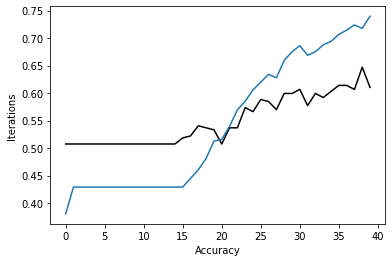

In [59]:
plt.plot(histc1.history['val_accuracy'],color='black')
plt.plot(histc1.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

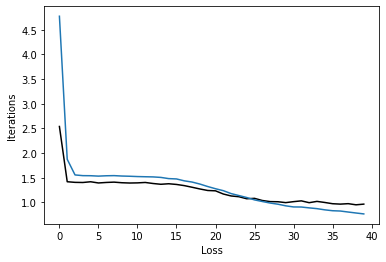

In [60]:
plt.plot(histc1.history['val_loss'],color='black')
plt.plot(histc1.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Bidirectional LSTM**

In [61]:

lsmodc1 = lstmm()

lshistc1 = lsmodc1.fit(X_train,Y_train,
         epochs = 45,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 634 samples, validate on 272 samples
Epoch 1/45
634/634 [==============================] - 10s 16ms/step - loss: 5.8271 - acc: 0.2177 - val_loss: 5.7639 - val_acc: 0.5074
Epoch 2/45
634/634 [==============================] - 8s 12ms/step - loss: 5.7027 - acc: 0.4196 - val_loss: 5.5314 - val_acc: 0.5074
Epoch 3/45
634/634 [==============================] - 8s 12ms/step - loss: 5.4064 - acc: 0.4290 - val_loss: 5.0173 - val_acc: 0.5074
Epoch 4/45
634/634 [==============================] - 8s 12ms/step - loss: 4.8855 - acc: 0.4290 - val_loss: 4.3109 - val_acc: 0.5074
Epoch 5/45
634/634 [==============================] - 8s 12ms/step - loss: 4.1877 - acc: 0.4290 - val_loss: 3.5441 - val_acc: 0.5074
Epoch 6/45
634/634 [==============================] - 8s 12ms/step - loss: 3.4295 - acc: 0.4290 - val_loss: 2.8389 - val_acc: 0.5074
Epoch 7/45
634/634 [==============================] - 8s 12ms/step - loss: 2.7545 - acc: 0.4290 - val_loss: 2.2453 - val_acc: 0.5074
Epoch 8/45
634/634 [==

In [62]:
model.append('Bidirectional LSTM Model')
scores = lsmodc1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmodc1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




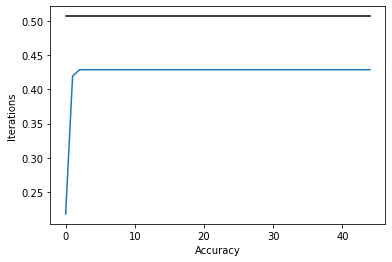

In [63]:
plt.plot(lshistc1.history['val_acc'],color='black')
plt.plot(lshistc1.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

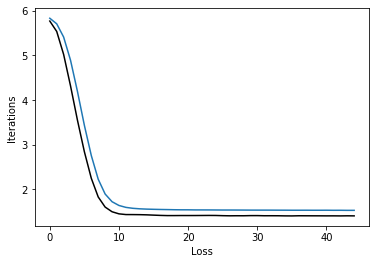

In [64]:
plt.plot(lshistc1.history['val_loss'],color='black')
plt.plot(lshistc1.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [65]:

convmodc1 = conv1d()



convhistc1 = convmodc1.fit(X_train, Y_train,
                      epochs = 45,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 634 samples, validate on 272 samples
Epoch 1/45
634/634 [==============================] - 4s 6ms/step - loss: 5.8180 - acc: 0.0000e+00 - val_loss: 5.7586 - val_acc: 0.0000e+00
Epoch 2/45
634/634 [==============================] - 3s 5ms/step - loss: 5.6467 - acc: 0.0110 - val_loss: 5.5500 - val_acc: 0.0699
Epoch 3/45
634/634 [==============================] - 3s 5ms/step - loss: 5.2663 - acc: 0.0915 - val_loss: 5.1102 - val_acc: 0.1287
Epoch 4/45
634/634 [==============================] - 3s 5ms/step - loss: 4.4682 - acc: 0.1656 - val_loss: 4.2437 - val_acc: 0.1287
Epoch 5/45
634/634 [==============================] - 3s 5ms/step - loss: 3.2258 - acc: 0.2082 - val_loss: 2.8662 - val_acc: 0.3824
Epoch 6/45
634/634 [==============================] - 3s 5ms/step - loss: 2.3289 - acc: 0.3912 - val_loss: 1.9062 - val_acc: 0.5074
Epoch 7/45
634/634 [==============================] - 3s 5ms/step - loss: 1.9928 - acc: 0.4290 - val_loss: 1.6216 - val_acc: 0.5074
Epoch 8/45
634/634 [==

In [66]:
model.append('1D Convolution Model')
scores = convmodc1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmodc1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

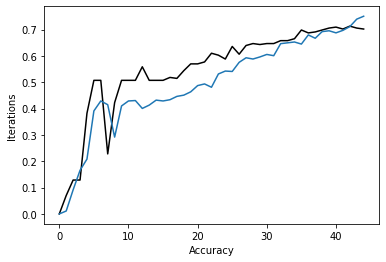

In [67]:
plt.plot(convhistc1.history['val_acc'],color='black')
plt.plot(convhistc1.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

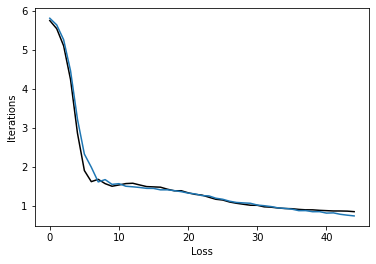

In [68]:
plt.plot(convhistc1.history['val_loss'],color='black')
plt.plot(convhistc1.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 1**


In [69]:
cluster1_accuracies=pd.DataFrame()
cluster1_accuracies['Model']=model
cluster1_accuracies['Accuracy(Test)']=accuracytest
cluster1_accuracies['Accuracy(Train)']=accuracytrain
cluster1_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,41.911765,46.687697
1,Multinomial Naive Bayes,53.676471,56.782334
2,Support Vector Machines,68.750000,81.072555
3,Decision Tree,47.426471,53.470032
4,Bagging Classifier,44.852941,49.842271
5,Adaboost Classifier,44.117647,50.315457
6,Gradient Boost Classifier,68.382353,85.962145
7,Decision Tree Hyper Tuned,58.088235,92.902208
8,Support Vector Machines- Hypertuned,75.735294,96.056782
9,Sequential Model,61.029410,74.290222


<BarContainer object of 12 artists>

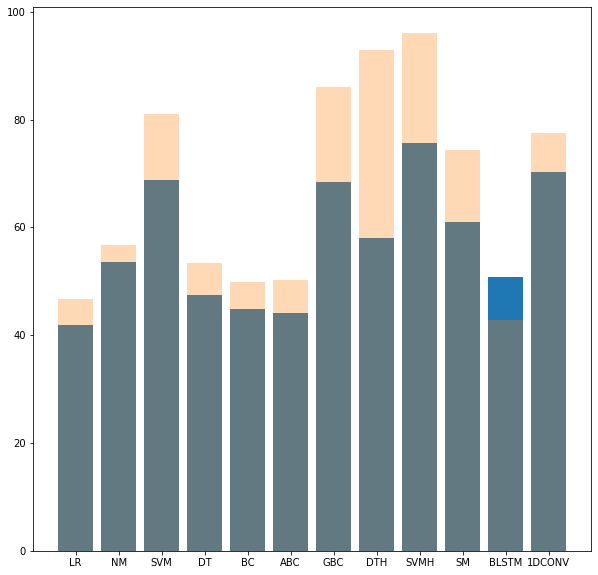

In [70]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster1_accuracies['Accuracy(Test)'])
plt.bar(x_axis,cluster1_accuracies['Accuracy(Train)'],alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Support Vector Machines seems to be the best of all


# **Applying different models on Cluster 2**

#### **Chi Square Analysis on Logistic Regression**

In [71]:
X = data['Description'][data['Cluster TFIDFV']==2]
Y = data['Assignment group'][data['Cluster TFIDFV']==2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [72]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [73]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 64.08083441981746
Accuracy Score Train: 62.92260407935177


#### **Creating the TFIDF Vectors for further processing**

In [74]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [75]:
nbc2 = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nbc2.fit(X,Y)

#Test Set
Y_pred = nbc2.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nbc2.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :70.07822685788787


              precision    recall  f1-score   support

           0       0.68      1.00      0.81       946
           1       0.00      0.00      0.00        20
           2       0.93      0.18      0.31        71
           3       0.00      0.00      0.00        45
           4       1.00      0.03      0.06        31
           5       0.00      0.00      0.00        71
           6       0.83      0.08      0.15        61
           7       0.98      0.75      0.85        79
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        15
          12       0.98      0.67      0.80        76
          13       0.00      0.00      0.00        24

    accuracy                           0.70      1534
   macro avg       0.39      0.19      0.21      1534
weighted avg       0.61      0.70      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [76]:
SVMc2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVMc2.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc2.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc2.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  77.05345501955672
Accuracy Score Train :  89.35456831517183


#### **Decision tree**


In [77]:
dTreec2 = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTreec2.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec2.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTreec2.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec2.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  67.01434159061279
Accuracy Score Train :  67.44900810282202


#### **Bagging Classifier**

In [78]:
bgc2 = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgc2 = bgc2.fit(train_vectors_0, Y_train)

y_predict = bgc2.predict(test_vectors_0)

print('Accuracy Score Test : ',bgc2.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgc2.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgc2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgc2.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  65.97131681877445
Accuracy Score Train :  64.85051690416317


#### **Adaboost Classifier**

In [79]:
abc2 = AdaBoostClassifier(n_estimators=10, random_state=1)
abc2 = abc2.fit(train_vectors_0, Y_train)

y_predict = abc2.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abc2.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abc2.score(test_vectors_0, Y_test)*100)


y_predict = abc2.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abc2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abc2.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  67.27509778357236
Accuracy Score Train :  66.275495948589


#### **Gradient Boost Classifier**



In [80]:
gbc2 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbc2 = gbc2.fit(train_vectors_0, Y_train)

y_predict = gbc2.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbc2.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbc2.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbc2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbc2.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  73.85919165580182
Accuracy Score Train :  91.36630343671416


#### **Randomized Search CV to enhance Decision tree**



In [81]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTreec2, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=58, criterion=gini, total=   0.4s
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..................... max_depth=58, criterion=gini, total=   0.5s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.4s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.4s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.4s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.4s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.4s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.4s
[CV] max_depth=34, criterion=gini ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [82]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 34}

In [83]:
dTreec22 = DecisionTreeClassifier(criterion = 'gini', max_depth=40,random_state=1)
dTreec22.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec22.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTreec22.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec22.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec22.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  71.05606258148632
Accuracy Score Train :  91.25454037440626


#### With the randomized search, it seems that we have a lower accuracy

In [84]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVMc2, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   1.6s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   1.5s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   1.6s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   2.8s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   2.7s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   2.6s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   1.4s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   1.3s
[CV] kernel=poly, gamma=auto, degree=0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [85]:
random_searchSVM.best_params_

{'C': 2.0999999999999996, 'degree': 4, 'gamma': 'scale', 'kernel': 'linear'}

In [86]:
SVMc22 = svm.SVC(C=2.69, kernel='poly', degree=1, gamma='scale')
SVMc22.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc22.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc22.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  78.03129074315514
Accuracy Score Train :  98.46325789326627


#### **Sequential Model**

In [87]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'][data['Cluster TFIDFV']==2])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'][data['Cluster TFIDFV']==2])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3579, 350) (3579,)
(1534, 350) (1534,)


In [88]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelsc2 = Sequential()
modelsc2.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelsc2.add(SpatialDropout1D(0.4))
modelsc2.add(MaxPooling1D(pool_size=4))
modelsc2.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelsc2.add(Dense(350,activation='softmax'))
modelsc2.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelsc2.summary())



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_7 (Dense)              (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
histc2=modelsc2.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = modelsc2.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = modelsc2.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3579 samples, validate on 1534 samples
Epoch 1/30
 - 22s - loss: 2.2521 - accuracy: 0.5943 - val_loss: 1.6289 - val_accuracy: 0.6063
Epoch 2/30
 - 21s - loss: 1.6128 - accuracy: 0.6063 - val_loss: 1.5478 - val_accuracy: 0.6063
Epoch 3/30
 - 22s - loss: 1.4546 - accuracy: 0.6270 - val_loss: 1.3628 - val_accuracy: 0.6428
Epoch 4/30
 - 22s - loss: 1.2527 - accuracy: 0.6611 - val_loss: 1.2389 - val_accuracy: 0.6799
Epoch 5/30
 - 22s - loss: 1.1018 - accuracy: 0.6985 - val_loss: 1.1994 - val_accuracy: 0.6825
Epoch 6/30
 - 21s - loss: 1.0011 - accuracy: 0.7189 - val_loss: 1.1693 - val_accuracy: 0.6949
Epoch 7/30
 - 21s - loss: 0.9304 - accuracy: 0.7332 - val_loss: 1.1577 - val_accuracy: 0.6956
Epoch 8/30
 - 21s - loss: 0.8571 - accuracy: 0.7457 - val_loss: 1.1698 - val_accuracy: 0.6949
Epoch 9/30
 - 22s - loss: 0.7899 - accuracy: 0.7642 - val_loss: 1.1809 - val_accuracy: 0.6741
Epoch 10/30
 - 22s - loss: 0.7270 - accuracy: 0.7835 - val_loss: 1.1859 - val_accuracy: 0.6793
Epoch 11/30

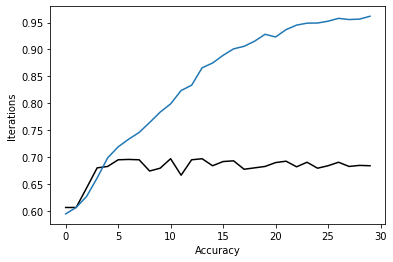

In [90]:
plt.plot(histc2.history['val_accuracy'],color='black')
plt.plot(histc2.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

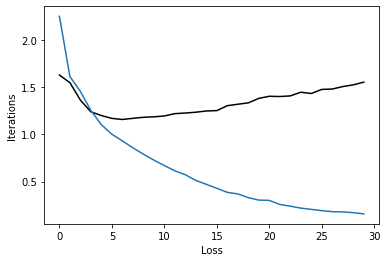

In [91]:
plt.plot(histc2.history['val_loss'],color='black')
plt.plot(histc2.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Bidirectional LSTM**

In [92]:

lsmodc2 = lstmm()

lshistc2 = lsmodc2.fit(X_train,Y_train,
         epochs = 30,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3579 samples, validate on 1534 samples
Epoch 1/30
3579/3579 [==============================] - 46s 13ms/step - loss: 5.0623 - acc: 0.5443 - val_loss: 3.3336 - val_acc: 0.6063
Epoch 2/30
3579/3579 [==============================] - 42s 12ms/step - loss: 2.2197 - acc: 0.6063 - val_loss: 1.6871 - val_acc: 0.6063
Epoch 3/30
3579/3579 [==============================] - 41s 12ms/step - loss: 1.6550 - acc: 0.6063 - val_loss: 1.6209 - val_acc: 0.6063
Epoch 4/30
3579/3579 [==============================] - 41s 11ms/step - loss: 1.6166 - acc: 0.6105 - val_loss: 1.5871 - val_acc: 0.6063
Epoch 5/30
3579/3579 [==============================] - 40s 11ms/step - loss: 1.5843 - acc: 0.6167 - val_loss: 1.5525 - val_acc: 0.6356
Epoch 6/30
3579/3579 [==============================] - 40s 11ms/step - loss: 1.5392 - acc: 0.6320 - val_loss: 1.5000 - val_acc: 0.6369
Epoch 7/30
3579/3579 [==============================] - 40s 11ms/step - loss: 1.4770 - acc: 0.6407 - val_loss: 1.4478 - val_acc: 0.6408


In [93]:
model.append('Bidirectional LSTM Model')
scores = lsmodc2.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmodc2.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




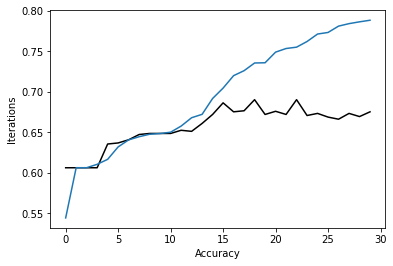

In [94]:
plt.plot(lshistc2.history['val_acc'],color='black')
plt.plot(lshistc2.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

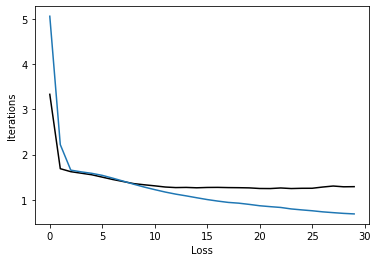

In [95]:
plt.plot(lshistc2.history['val_loss'],color='black')
plt.plot(lshistc2.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [96]:
  
convmodc2 = conv1d()



convhistc2 = convmodc2.fit(X_train, Y_train,
                      epochs = 30,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3579 samples, validate on 1534 samples
Epoch 1/30
3579/3579 [==============================] - 17s 5ms/step - loss: 4.2138 - acc: 0.5434 - val_loss: 2.0050 - val_acc: 0.6056
Epoch 2/30
3579/3579 [==============================] - 17s 5ms/step - loss: 1.7014 - acc: 0.6239 - val_loss: 1.8557 - val_acc: 0.6343
Epoch 3/30
3579/3579 [==============================] - 17s 5ms/step - loss: 1.4785 - acc: 0.6334 - val_loss: 1.6935 - val_acc: 0.6362
Epoch 4/30
3579/3579 [==============================] - 17s 5ms/step - loss: 1.3726 - acc: 0.6415 - val_loss: 1.5974 - val_acc: 0.6532
Epoch 5/30
3579/3579 [==============================] - 17s 5ms/step - loss: 1.2678 - acc: 0.6602 - val_loss: 1.4437 - val_acc: 0.6538
Epoch 6/30
3579/3579 [==============================] - 17s 5ms/step - loss: 1.1711 - acc: 0.6784 - val_loss: 1.4278 - val_acc: 0.6578
Epoch 7/30
3579/3579 [==============================] - 17s 5ms/step - loss: 1.0876 - acc: 0.6879 - val_loss: 1.3437 - val_acc: 0.6630
Epoch 8

In [97]:
model.append('1D Convolution Model')
scores = convmodc2.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmodc2.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

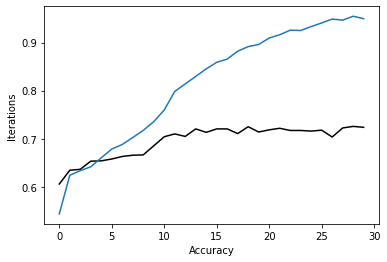

In [98]:
plt.plot(convhistc2.history['val_acc'],color='black')
plt.plot(convhistc2.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

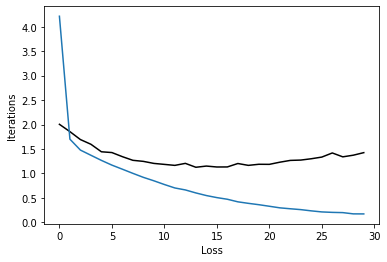

In [99]:
plt.plot(convhistc2.history['val_loss'],color='black')
plt.plot(convhistc2.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 2**


In [100]:
cluster1_accuracies=pd.DataFrame()
cluster1_accuracies['Model']=model
cluster1_accuracies['Accuracy(Test)']=accuracytest
cluster1_accuracies['Accuracy(Train)']=accuracytrain
cluster1_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,64.080834,62.922604
1,Multinomial Naive Bayes,70.078227,69.460743
2,Support Vector Machines,77.053455,89.354568
3,Decision Tree,67.014342,67.449008
4,Bagging Classifier,65.971317,64.850517
5,Adaboost Classifier,67.275098,66.275496
6,Gradient Boost Classifier,73.859192,91.366303
7,Decision Tree Hyper Tuned,71.056063,91.254540
8,Support Vector Machines- Hypertuned,78.031291,98.463258
9,Sequential Model,68.383312,96.814752


<BarContainer object of 12 artists>

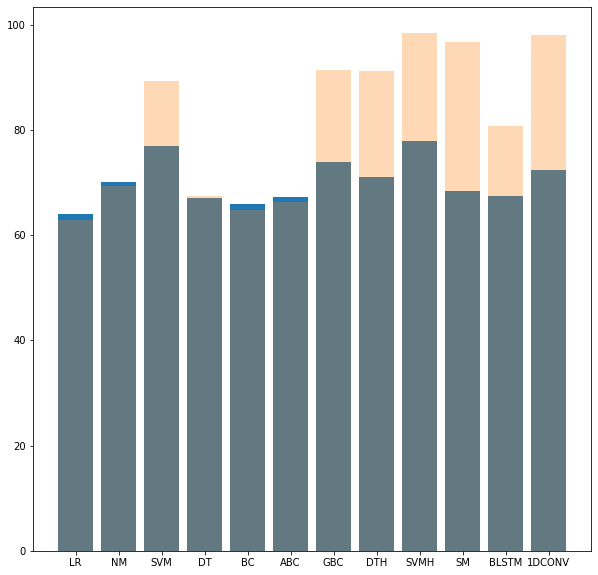

In [101]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster1_accuracies['Accuracy(Test)'])
plt.bar(x_axis,cluster1_accuracies['Accuracy(Train)'],alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Support Vector Machines seems to be the best of all


# **Applying models on the entire data without clustering**

In [102]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data.Description)
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4843, 350) (4843,)
(2076, 350) (2076,)


In [103]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelq = Sequential()
modelq.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelq.add(SpatialDropout1D(0.4))
modelq.add(MaxPooling1D(pool_size=4))
modelq.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelq.add(Dense(350,activation='softmax'))
modelq.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelq.summary())



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               142800    
_________________________________________________________________
dense_10 (Dense)             (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [104]:
modelq.fit(X,Y, validation_data = (X_test, Y_test), epochs=10, batch_size=32, verbose=2) 
# Final evaluation of the model
scores = modelq.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6919 samples, validate on 2076 samples
Epoch 1/10
 - 39s - loss: 1.9301 - accuracy: 0.5816 - val_loss: 1.3980 - val_accuracy: 0.6633
Epoch 2/10
 - 38s - loss: 1.2971 - accuracy: 0.6604 - val_loss: 1.1281 - val_accuracy: 0.6787
Epoch 3/10
 - 38s - loss: 1.1109 - accuracy: 0.6903 - val_loss: 0.9836 - val_accuracy: 0.7148
Epoch 4/10
 - 39s - loss: 0.9988 - accuracy: 0.7075 - val_loss: 0.8982 - val_accuracy: 0.7283
Epoch 5/10
 - 38s - loss: 0.9246 - accuracy: 0.7212 - val_loss: 0.8291 - val_accuracy: 0.7413
Epoch 6/10
 - 38s - loss: 0.8727 - accuracy: 0.7328 - val_loss: 0.7982 - val_accuracy: 0.7524
Epoch 7/10
 - 38s - loss: 0.8105 - accuracy: 0.7443 - val_loss: 0.7102 - val_accuracy: 0.7611
Epoch 8/10
 - 38s - loss: 0.7429 - accuracy: 0.7602 - val_loss: 0.6708 - val_accuracy: 0.7750
Epoch 9/10
 - 38s - loss: 0.6757 - accuracy: 0.7807 - val_loss: 0.5935 - val_accuracy: 0.8107
Epoch 10/10
 - 38s - loss: 0.6275 - accuracy: 0.8032 - val_loss: 0.5422 - val_accuracy: 0.8425
Accuracy: 8

#### **Chi Square Analysis on Logistic Regression**

In [105]:
X = data['Description']
Y = data['Assignment group']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [106]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [107]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 59.15221579961464
Accuracy Score Train: 58.37290935370638


#### **Creating the TFIDF Vectors for further processing**

In [108]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [109]:
nbq = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nbq.fit(X,Y)

#Test Set
Y_pred = nbq.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nbq.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :70.56840077071291


              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1206
           1       0.00      0.00      0.00        39
           2       0.94      0.22      0.36        68
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        69
           6       0.75      0.09      0.16        69
           7       0.98      0.61      0.75        90
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        33
          11       0.00      0.00      0.00        59
          12       0.57      0.92      0.71       198
          13       0.00      0.00      0.00        72

    accuracy                           0.71      2076
   macro avg       0.28      0.20      0.20      2076
weighted avg       0.57      0.71      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [110]:
SVMq = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVMq.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMq.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMq.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)




Accuracy Score Test:  78.51637764932563
Accuracy Score Train :  88.82923807557299


#### **Decision tree**


In [111]:
dTreeq = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTreeq.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreeq.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTreeq.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreeq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreeq.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  67.67822736030828
Accuracy Score Train :  68.1808796200702


#### **Bagging Classifier**

In [112]:
bgclq = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgclq = bgclq.fit(train_vectors_0, Y_train)

y_predict = bgclq.predict(test_vectors_0)

print('Accuracy Score Test : ',bgclq.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgclq.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgclq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgclq.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  66.28131021194605
Accuracy Score Train :  65.45529630394384


#### **Adaboost Classifier**

In [113]:
abclq = AdaBoostClassifier(n_estimators=10, random_state=1)
abclq = abclq.fit(train_vectors_0, Y_train)

y_predict = abclq.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abclq.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abclq.score(test_vectors_0, Y_test)*100)


y_predict = abclq.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abclq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abclq.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  64.98073217726397
Accuracy Score Train :  63.968614495147634


#### **Gradient Boost Classifier**



In [114]:
gbclq = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbclq = gbcl.fit(train_vectors_0, Y_train)

y_predict = gbclq.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbclq.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbclq.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbclq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbclq.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  75.43352601156069
Accuracy Score Train :  92.02973363617592


#### **Randomized Search CV to enhance Decision tree**



In [115]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTreeq, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=58, criterion=gini, total=   0.5s
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... max_depth=58, criterion=gini, total=   0.5s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.5s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.4s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.4s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.5s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.4s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.4s
[CV] max_depth=34, criterion=gini ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [116]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 29}

In [117]:
dTreeqq = DecisionTreeClassifier(criterion = 'gini', max_depth=29,random_state=1)
dTreeqq.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreeqq.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTreeqq.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreeqq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreeqq.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  70.76107899807322
Accuracy Score Train :  90.64629361965724


In [118]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVMq, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   2.4s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   2.4s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   2.5s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   3.4s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   3.4s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   3.5s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   2.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   1.9s
[CV] kernel=poly, gamma=auto, degree=0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [119]:
random_searchSVM.best_params_

{'C': 2.6999999999999997, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [120]:
SVMqq = svm.SVC(C=2.69, kernel='poly', degree=1, gamma='scale')
SVMqq.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMqq.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMqq.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  80.49132947976878
Accuracy Score Train :  97.64608713607268


#### **Sequential Model**

In [121]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4843, 350) (4843,)
(2076, 350) (2076,)


In [122]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelsq = Sequential()
modelsq.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelsq.add(SpatialDropout1D(0.4))
modelsq.add(MaxPooling1D(pool_size=4))
modelsq.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelsq.add(Dense(350,activation='softmax'))
modelsq.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelsq.summary())



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               142800    
_________________________________________________________________
dense_11 (Dense)             (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
histq=modelsq.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = modelsq.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = modelsq.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4843 samples, validate on 2076 samples
Epoch 1/30
 - 28s - loss: 2.1619 - accuracy: 0.5587 - val_loss: 1.5815 - val_accuracy: 0.5930
Epoch 2/30
 - 27s - loss: 1.4061 - accuracy: 0.6438 - val_loss: 1.2274 - val_accuracy: 0.6715
Epoch 3/30
 - 27s - loss: 1.1709 - accuracy: 0.6733 - val_loss: 1.1122 - val_accuracy: 0.6932
Epoch 4/30
 - 27s - loss: 1.0364 - accuracy: 0.6987 - val_loss: 1.0512 - val_accuracy: 0.7042
Epoch 5/30
 - 27s - loss: 0.9482 - accuracy: 0.7161 - val_loss: 1.0386 - val_accuracy: 0.7095
Epoch 6/30
 - 28s - loss: 0.8701 - accuracy: 0.7246 - val_loss: 1.0076 - val_accuracy: 0.7139
Epoch 7/30
 - 28s - loss: 0.7972 - accuracy: 0.7462 - val_loss: 0.9893 - val_accuracy: 0.7076
Epoch 8/30
 - 27s - loss: 0.7420 - accuracy: 0.7607 - val_loss: 0.9863 - val_accuracy: 0.7071
Epoch 9/30
 - 27s - loss: 0.6727 - accuracy: 0.7799 - val_loss: 0.9943 - val_accuracy: 0.7283
Epoch 10/30
 - 28s - loss: 0.6159 - accuracy: 0.8026 - val_loss: 0.9911 - val_accuracy: 0.7274
Epoch 11/30

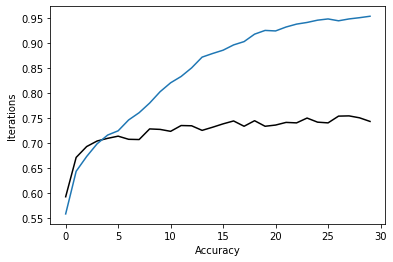

In [124]:
plt.plot(histq.history['val_accuracy'],color='black')
plt.plot(histq.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

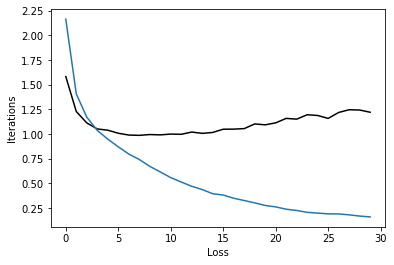

In [125]:
plt.plot(histq.history['val_loss'],color='black')
plt.plot(histq.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Bidirectional LSTM**

In [126]:

lsmodq = lstmm()

lshistq = lsmodq.fit(X_train,Y_train,
         epochs = 30,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4843 samples, validate on 2076 samples
Epoch 1/30
4843/4843 [==============================] - 57s 12ms/step - loss: 4.5335 - acc: 0.5077 - val_loss: 2.2979 - val_acc: 0.5930
Epoch 2/30
4843/4843 [==============================] - 54s 11ms/step - loss: 1.9099 - acc: 0.5660 - val_loss: 1.6905 - val_acc: 0.5930
Epoch 3/30
4843/4843 [==============================] - 54s 11ms/step - loss: 1.7172 - acc: 0.5695 - val_loss: 1.5987 - val_acc: 0.5930
Epoch 4/30
4843/4843 [==============================] - 54s 11ms/step - loss: 1.5822 - acc: 0.6190 - val_loss: 1.4626 - val_acc: 0.6710
Epoch 5/30
4843/4843 [==============================] - 55s 11ms/step - loss: 1.4400 - acc: 0.6599 - val_loss: 1.3486 - val_acc: 0.6705
Epoch 6/30
4843/4843 [==============================] - 54s 11ms/step - loss: 1.3316 - acc: 0.6618 - val_loss: 1.2812 - val_acc: 0.6710
Epoch 7/30
4843/4843 [==============================] - 59s 12ms/step - loss: 1.2430 - acc: 0.6612 - val_loss: 1.2312 - val_acc: 0.6700


In [127]:
model.append('Bidirectional LSTM Model')
scores = lsmodq.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmodq.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




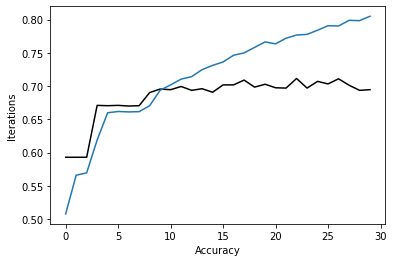

In [128]:
plt.plot(lshistq.history['val_acc'],color='black')
plt.plot(lshistq.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

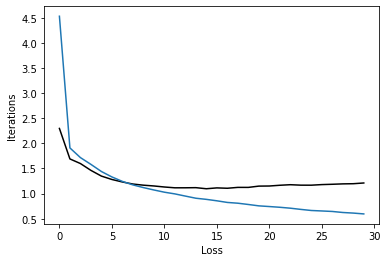

In [129]:
plt.plot(lshistq.history['val_loss'],color='black')
plt.plot(lshistq.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [130]:
  
convmodq = conv1d()



convhistq = convmodq.fit(X_train, Y_train,
                      epochs = 30,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4843 samples, validate on 2076 samples
Epoch 1/30
4843/4843 [==============================] - 24s 5ms/step - loss: 4.1676 - acc: 0.4543 - val_loss: 2.1182 - val_acc: 0.6238
Epoch 2/30
4843/4843 [==============================] - 23s 5ms/step - loss: 1.6208 - acc: 0.6180 - val_loss: 1.7413 - val_acc: 0.6604
Epoch 3/30
4843/4843 [==============================] - 23s 5ms/step - loss: 1.3821 - acc: 0.6469 - val_loss: 1.5309 - val_acc: 0.6686
Epoch 4/30
4843/4843 [==============================] - 23s 5ms/step - loss: 1.2715 - acc: 0.6529 - val_loss: 1.4781 - val_acc: 0.6777
Epoch 5/30
4843/4843 [==============================] - 23s 5ms/step - loss: 1.1658 - acc: 0.6653 - val_loss: 1.3296 - val_acc: 0.6922
Epoch 6/30
4843/4843 [==============================] - 23s 5ms/step - loss: 1.0741 - acc: 0.6824 - val_loss: 1.2872 - val_acc: 0.6821
Epoch 7/30
4843/4843 [==============================] - 24s 5ms/step - loss: 0.9779 - acc: 0.7066 - val_loss: 1.1535 - val_acc: 0.6946
Epoch 8

In [131]:
model.append('1D Convolution Model')
scores = convmodq.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmodq.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

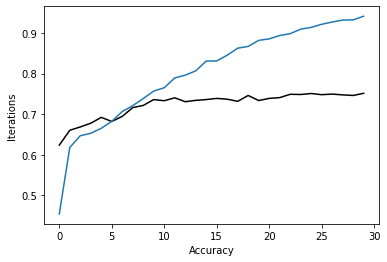

In [132]:
plt.plot(convhistq.history['val_acc'],color='black')
plt.plot(convhistq.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

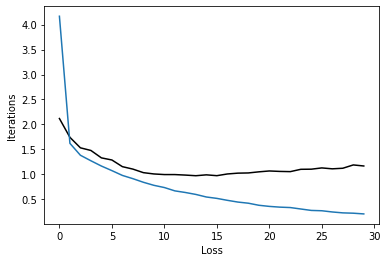

In [133]:
plt.plot(convhistq.history['val_loss'],color='black')
plt.plot(convhistq.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 2**


In [134]:
cluster1_accuracies=pd.DataFrame()
cluster1_accuracies['Model']=model
cluster1_accuracies['Accuracy(Test)']=accuracytest
cluster1_accuracies['Accuracy(Train)']=accuracytrain
cluster1_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,59.152216,58.372909
1,Multinomial Naive Bayes,70.568401,69.770803
2,Support Vector Machines,78.516378,88.829238
3,Decision Tree,67.678227,68.180880
4,Bagging Classifier,66.281310,65.455296
5,Adaboost Classifier,64.980732,63.968614
6,Gradient Boost Classifier,75.433526,92.029734
7,Decision Tree Hyper Tuned,70.761079,90.646294
8,Support Vector Machines- Hypertuned,80.491329,97.646087
9,Sequential Model,74.325627,96.448481


<BarContainer object of 12 artists>

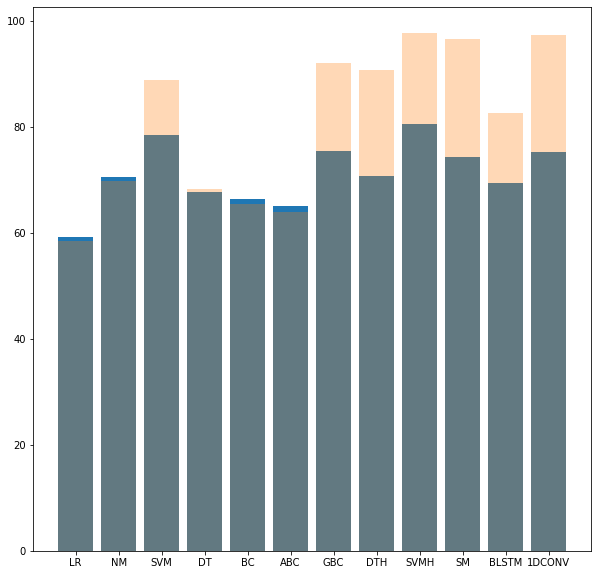

In [135]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster1_accuracies['Accuracy(Test)'])
plt.bar(x_axis,cluster1_accuracies['Accuracy(Train)'],alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Support Vector Machines seems to be the best of all
